# About

- Yulu is India’s leading micro-mobility service provider, which offers unique vehicles for the daily commute. Starting off as a mission to eliminate traffic congestion in India, Yulu provides the safest commute solution through a user-friendly mobile app to enable shared, solo and sustainable commuting.

- Yulu zones are located at all the appropriate locations (including metro stations, bus stands, office spaces, residential areas, corporate offices, etc) to make those first and last miles smooth, affordable, and convenient!

- Yulu has recently suffered considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the Indian market.

# Objective

## The company wants to know:

- Which variables are significant in predicting the demand for shared electric cycles in the Indian market?
- How well those variables describe the electric cycle demands

## Dataset Link:

**Dataset :** [yulu_data.csv](https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089)

# Importing Libraries And Loading the Dataset.

In [88]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import plotly.graph_objs as go
import plotly.express as px
import datetime as dt
from scipy.stats import ttest_ind,levene,shapiro,f_oneway,chi2_contingency
from statsmodels.graphics.gofplots import qqplot
import matplotlib.pyplot as plt

df = pd.read_csv("https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089")
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


# Basic Analysis

In [89]:
df.shape

(10886, 12)

### Analysis:

- Number of rows = 10886

- Number of columns = 12

In [90]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

# Data Description.

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


- All Columns are Numeric except datetime column.
- There are no missing values in the dataframe.
- Categorical value like season,holiday,weather,etc. are int64 we will convert them to categorical value.
- Convert datetime  from object type to datetime type.

In [92]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
season,10886.0,2.506614,1.116174,1.00,2.0000,3.000,4.0000,4.0000
holiday,10886.0,0.028569,0.166599,0.00,0.0000,0.000,0.0000,1.0000
workingday,10886.0,0.680875,0.466159,0.00,0.0000,1.000,1.0000,1.0000
weather,10886.0,1.418427,0.633839,1.00,1.0000,1.000,2.0000,4.0000
temp,10886.0,20.230860,7.791590,0.82,13.9400,20.500,26.2400,41.0000
atemp,10886.0,23.655084,8.474601,0.76,16.6650,24.240,31.0600,45.4550
humidity,10886.0,61.886460,19.245033,0.00,47.0000,62.000,77.0000,100.0000
windspeed,10886.0,12.799395,8.164537,0.00,7.0015,12.998,16.9979,56.9969
casual,10886.0,36.021955,49.960477,0.00,4.0000,17.000,49.0000,367.0000
registered,10886.0,155.552177,151.039033,0.00,36.0000,118.000,222.0000,886.0000


# Data Processing.

## Converting 'datetime' to datetime.

In [93]:
df['datetime']=pd.to_datetime(df['datetime'])
df['datetime']

0       2011-01-01 00:00:00
1       2011-01-01 01:00:00
2       2011-01-01 02:00:00
3       2011-01-01 03:00:00
4       2011-01-01 04:00:00
                ...        
10881   2012-12-19 19:00:00
10882   2012-12-19 20:00:00
10883   2012-12-19 21:00:00
10884   2012-12-19 22:00:00
10885   2012-12-19 23:00:00
Name: datetime, Length: 10886, dtype: datetime64[ns]

## Converting season,weather,holiday and workingday columns into categorical

In [113]:
def season_type(x):
    if x==1:
        return 'spring'
    elif x==2:
        return 'summer'
    elif x==3:
        return 'fall'
    else:
        return 'winter'

df['season']=df['season'].apply(lambda x:season_type(x))

df['season']= pd.Categorical(df['season'])
df['weather']=pd.Categorical(df['weather'])
df['holiday']=pd.Categorical(df['holiday'])
df['workingday']=pd.Categorical(df['workingday'])

## Statistical Summary after data-type conversion

In [95]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
datetime,10886,2011-12-27 05:56:22.399411968,2011-01-01 00:00:00,2011-07-02 07:15:00,2012-01-01 20:30:00,2012-07-01 12:45:00,2012-12-19 23:00:00,NaN
temp,10886.0,20.23086,0.82,13.94,20.5,26.24,41.0,7.79159
atemp,10886.0,23.655084,0.76,16.665,24.24,31.06,45.455,8.474601
humidity,10886.0,61.88646,0.0,47.0,62.0,77.0,100.0,19.245033
windspeed,10886.0,12.799395,0.0,7.0015,12.998,16.9979,56.9969,8.164537
casual,10886.0,36.021955,0.0,4.0,17.0,49.0,367.0,49.960477
registered,10886.0,155.552177,0.0,36.0,118.0,222.0,886.0,151.039033
count,10886.0,191.574132,1.0,42.0,145.0,284.0,977.0,181.144454


# Outlier Detection using the z-score method

- We can detect outliers in numeric column using the z-score.

- If the z score of a data point is more than 3, it indicates that the data point is quite different from the other data points. Such a data point can be an outlier.

- z score= (x-mean)/std.deviation.


In [96]:
outliers={}
for col in df.select_dtypes(include=np.number):
    
    #finding z-score for each value in a column
    z_score= np.abs((df[col]-df[col].mean()))/df[col].std()
    
    # if the z score of a value is a grater than 3 than the value is outlier
    column_outliers=df[z_score > 3][col]
    
    outliers[col]=column_outliers
    
for col,outlier_values in outliers.items():
    print(f"Outliers for {col} column")
    print(outlier_values)
    print()

Outliers for temp column
Series([], Name: temp, dtype: float64)

Outliers for atemp column
Series([], Name: atemp, dtype: float64)

Outliers for humidity column
1091    0
1092    0
1093    0
1094    0
1095    0
1096    0
1097    0
1098    0
1099    0
1100    0
1101    0
1102    0
1103    0
1104    0
1105    0
1106    0
1107    0
1108    0
1109    0
1110    0
1111    0
1112    0
Name: humidity, dtype: int64

Outliers for windspeed column
265      39.0007
613      39.0007
750      43.9989
752      40.9973
753      40.9973
          ...   
9481     43.0006
9482     43.0006
9484     39.0007
9754     39.0007
10263    43.0006
Name: windspeed, Length: 67, dtype: float64

Outliers for casual column
1384     219
1385     240
1935     196
2127     195
2129     206
        ... 
10226    195
10227    262
10228    292
10229    304
10230    260
Name: casual, Length: 292, dtype: int64

Outliers for registered column
6611     623
6634     614
6635     638
6649     628
6658     642
        ... 
10702  

## Observations:

- There no outliers in 'temp' and 'atemp' column.
- Outliers are evident within the 'humidity' and 'windspeed' columns based on the observations.
- Outliers are noticeable in the counts of casual and registered users, though drawing definite conclusions necessitates analyzing their relationship with independent variables.

# Univariate Analysis.

## Distribution of Working Day.

In [97]:
workingday_df=df.groupby(['workingday'],observed=False).agg(number_of_cycles_rented=('count','sum')).reset_index()
workingday_df

,workingday,number_of_cycles_rented
0,0,654872
1,1,1430604


In [98]:
labels= workingday_df['workingday']
values= workingday_df['number_of_cycles_rented']

colors = ['#C0E0DE','#4F7CAC']

bar_chart = go.Figure(go.Bar(x=labels, y=values, marker_color=colors))
bar_chart

### Conclusion

- On working days, 68.6% of cycles are rented, whereas on non-working days, 31.4% of cycles are rented.

## Distribution of Season.

In [99]:
season_df=df.groupby(['season'],observed=False).agg(number_of_cycles_rented=('count','sum')).reset_index()
season_df

,season,number_of_cycles_rented
0,1,312498
1,2,588282
2,3,640662
3,4,544034


In [100]:
labels= season_df['season']
values= season_df['number_of_cycles_rented']

colors = ['#D4D2A5','#FCDEBE','#ddbea9','#ffc8dd']

bar_chart = go.Figure(go.Bar(x=labels, y=values, marker_color=colors))
bar_chart

### Conclusion.

- During the fall season, approximately 30.7% of cycles are rented.
- In the summer season, around 28.2% of cycles are rented.
- The winter season records a rental rate of about 26.1% for cycles.
- The lowest rental rate, at just 15%, is observed in the spring season.

## Distribution Of Weather.

In [101]:
weather_df=df.groupby(['weather'],observed=False).agg(number_of_cycles_rented=('count','sum')).reset_index()
weather_df

,weather,number_of_cycles_rented
0,1,1476063
1,2,507160
2,3,102089
3,4,164


In [102]:
labels= weather_df['weather']
values= weather_df['number_of_cycles_rented']

#create pie chart
# Create pie chart
colors =  ["#b9e769","#efea5a","#f1c453"]

bar_chart = go.Figure(go.Bar(x=labels, y=values, marker_color=colors))
bar_chart


### Conclusion.

- Weather condition 1 experiences the highest rental rate, with approximately 70.8% of cycles rented.
- In weather condition 2, around 24.3% of cycles are rented.
- Weather condition 3 has a rental rate of approximately 4.9% for cycles.
- Weather condition 4 exhibits an exceptionally low rental rate, with only 0.00786% of cycles being rented.

## Trends in Average Cycle rentals(Hourly).

In [103]:
hour_df=df.groupby(df['datetime'].dt.hour).agg(average_cycles_rented=('count','mean')).reset_index()
hour_df

,datetime,average_cycles_rented
0,0,55.138462
1,1,33.859031
2,2,22.899554
3,3,11.757506
4,4,6.407240
5,5,19.767699
6,6,76.259341
7,7,213.116484
8,8,362.769231
9,9,221.780220


In [104]:
fig = px.line(hour_df, x='datetime', y='average_cycles_rented', markers=True)
fig.update_xaxes(tickvals=list(range(25)))
fig.update_layout(title='Average cycles rented in hourly basis',
                   xaxis_title='Hours',
                   yaxis_title='Average cycles rented')
fig.show()

### Conclusion.

- The highest average count of rental bikes is observed at 5 PM, closely followed by 6 PM and 8 AM. This indicates distinct peak hours during the day when cycling is most popular.
- Conversely, the lowest average count of rental bikes occurs at 4 AM, with 3 AM and 5 AM also showing low counts. These hours represent the early morning period with the least demand for cycling.
- Notably, there is an increasing trend in cycle rentals between 5 AM and 8 AM, suggesting a surge in demand during the early morning hours as people start their day.
- Additionally, there is a decreasing trend in cycle rentals from 5 PM to 11 PM, indicating a gradual decline in demand as the day progresses into the evening and nighttime.

## Trends in Average Cycle rentals(Monthly).

In [105]:
month_df=df.groupby(df['datetime'].dt.month).agg(average_cycles_rented=('count','mean')).reset_index()
month_df

,datetime,average_cycles_rented
0,1,90.366516
1,2,110.003330
2,3,148.169811
3,4,184.160616
4,5,219.459430
5,6,242.031798
6,7,235.325658
7,8,234.118421
8,9,233.805281
9,10,227.699232


In [106]:
fig = px.line(month_df, x='datetime', y='average_cycles_rented', markers=True)
fig.update_xaxes(tickvals=list(range(1,13)),ticktext=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
fig.update_layout(title='Average cycles rented on monthly basis',
                   xaxis_title='Month',
                   yaxis_title='Average cycles rented')
fig.show()

### Conclusion.

- The highest average hourly count of rental bikes occurs in June, July, and August, reflecting the peak demand during summer.
- Conversely, the lowest average hourly count of rental bikes is found in January, February, and March, which are the winter months with reduced cycling activity.
- Notably, there is an increasing trend in average bike rentals from February to June, corresponding to the shift from winter to spring and summer.
- Conversely, a decreasing trend in average bike rentals is observed from October to December due to the onset of winter.

## Distribution of temp, atemp, humidity and windspeed

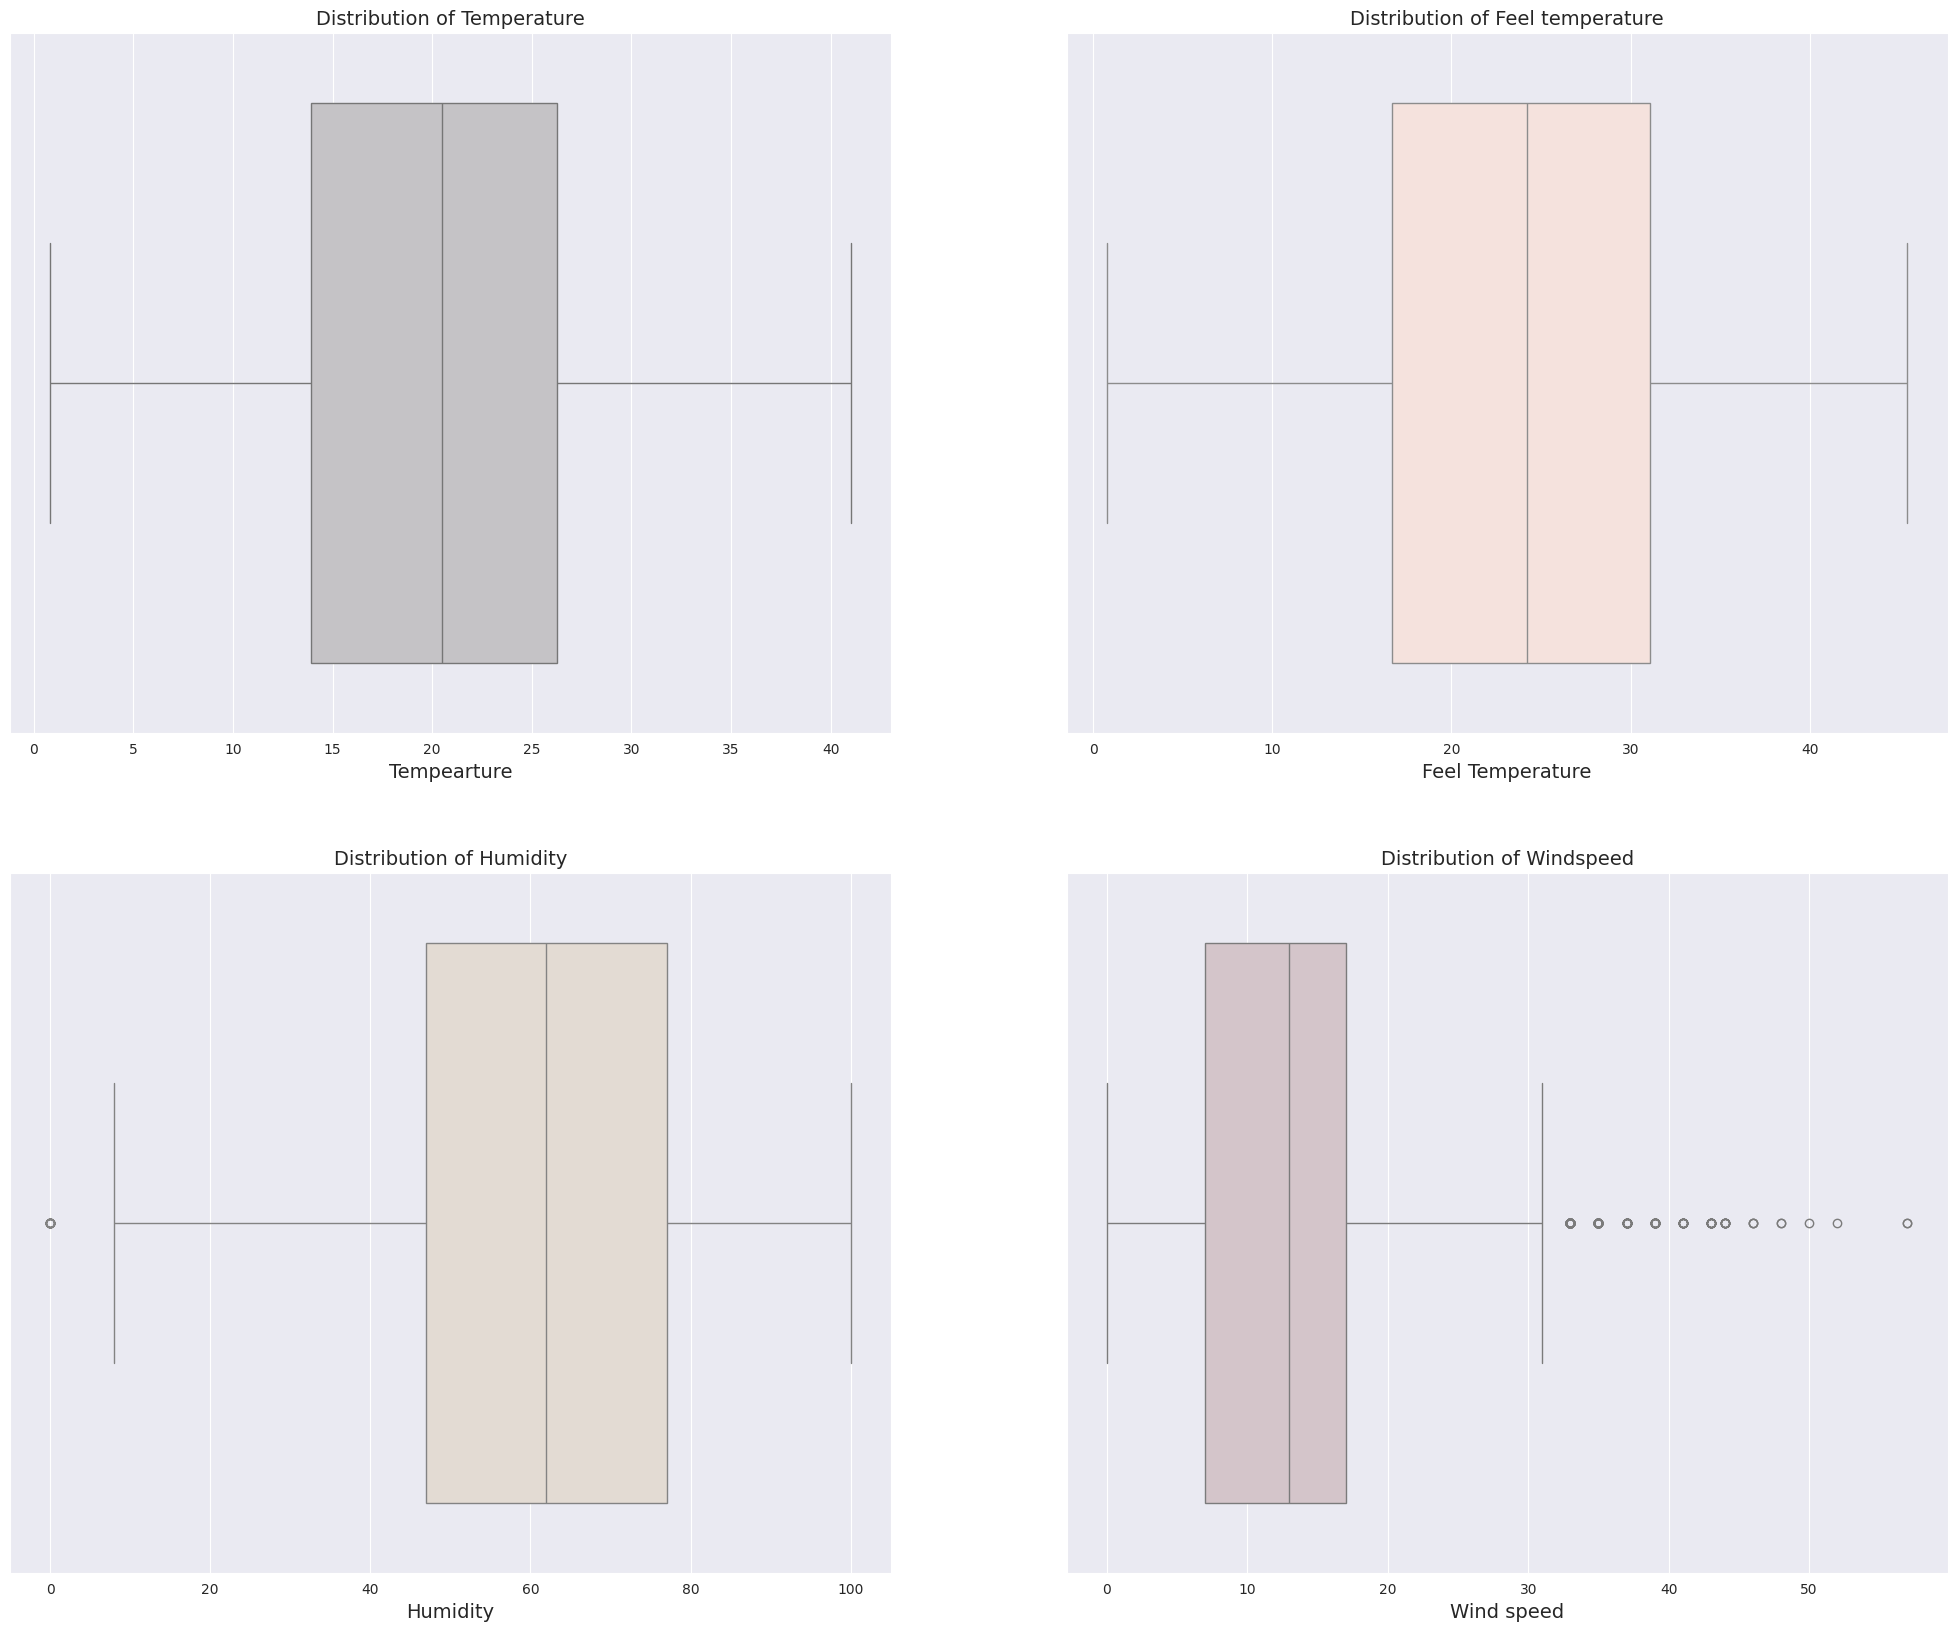

In [107]:
sns.set_style('darkgrid')
plt.figure(figsize=(25,20))

# temp column 
plt.subplot(2,2,1)
sns.boxplot(data=df,x='temp',color='#C5C3C6')
plt.xlabel('Tempearture',fontsize=14)
plt.title('Distribution of Temperature',fontsize=14)

#feel temperature
plt.subplot(2,2,2)
sns.boxplot(data=df,x='atemp',color='#F9E0D9')
plt.xlabel('Feel Temperature',fontsize=14)
plt.title('Distribution of Feel temperature',fontsize=14)

#Humidity
plt.subplot(2,2,3)

sns.boxplot(data=df,x='humidity',color='#E6DBD0')
plt.xlabel('Humidity',fontsize=14)
plt.title('Distribution of Humidity',fontsize=14)

#Wind Speed
plt.subplot(2,2,4)
sns.boxplot(data=df,x='windspeed',color='#D6C3C9')
plt.xlabel('Wind speed',fontsize=14)
plt.title('Distribution of Windspeed',fontsize=14)


plt.show()

### Conclusion.

- No outliers are detected in the 'temp' and 'atemp' columns, suggesting that the temperature-related data points fall within the expected range.
- In the 'humidity' column, a single value is identified as an outlier, implying an unusual humidity measurement distinct from the others.
- The 'windspeed' column contains 12 outlier values, indicating instances where wind speed measurements significantly deviate from the typical range.

## Distribution of Casual count, Registered count and Total count

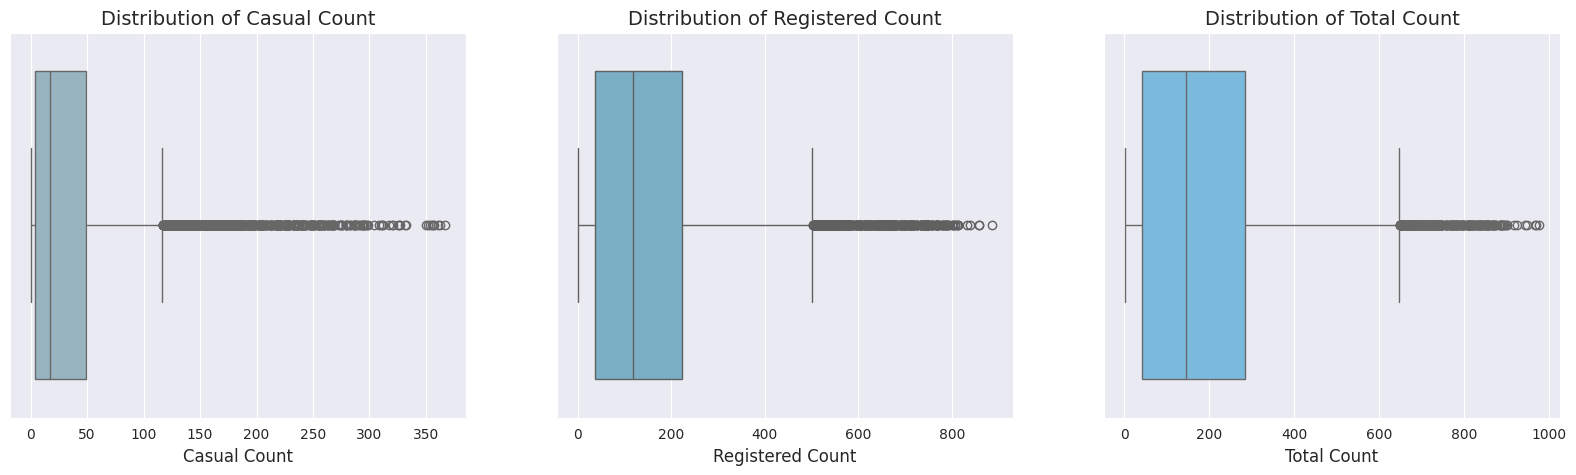

In [108]:


plt.figure(figsize=(20,5))

# Boxplot for temp column 
plt.subplot(1,3,1)
sns.boxplot(data=df,x='casual',color='#91B7C7')
plt.xlabel('Casual Count',fontsize=12)
plt.title('Distribution of Casual Count',fontsize=14)

#Boxplot for feel temperature
plt.subplot(1,3,2)
sns.boxplot(data=df,x='registered',color='#6EB4D1')
plt.xlabel('Registered Count',fontsize=12)
plt.title('Distribution of Registered Count',fontsize=14)

#Boxplot for Humidity
plt.subplot(1,3,3)
sns.boxplot(data=df,x='count',color='#6CBEED')
plt.xlabel('Total Count',fontsize=12)
plt.title('Distribution of Total Count',fontsize=14)


plt.show()



### Conclusion.

- The box plot clearly indicates the presence of outliers in the number of casual and registered users. However, further analysis against independent variables is needed before making definitive comments.
- The box plot reveal data skewness. As we proceed, we will decide whether to address outliers or perform variable transformation. In this case, given the significant number of outliers, variable transformation, specifically Log Transformation, seems to be a more appropriate approach.

# Bivariate Analysis.

## Distribution of count of rented bikes across working day

Text(0, 0.5, 'Probablity Density')

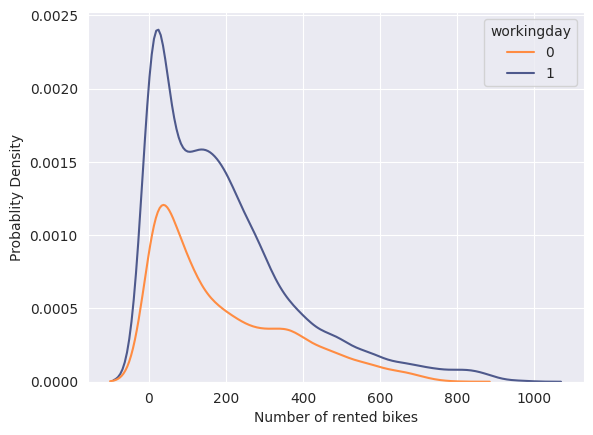

In [109]:
sns.set_style('darkgrid')
sns.kdeplot(data=df,x='count',hue='workingday',palette=['#FF8C42','#4E598C'])
plt.xlabel('Number of rented bikes')
plt.ylabel('Probablity Density')

### Conclusion.

The probability of renting bikes on a working day appears to be higher than on a non-working day, as evidenced by our univariate analysis, where 68.6% of bike rentals occurred on working days compared to 31.4% on non-working days. However, we will further investigate this through hypothesis testing to determine if the working day indeed has a statistically significant effect on the number of cycles rented."

## Distribution of count of rented bikes across Season

Text(0, 0.5, 'Number of bikes rented')

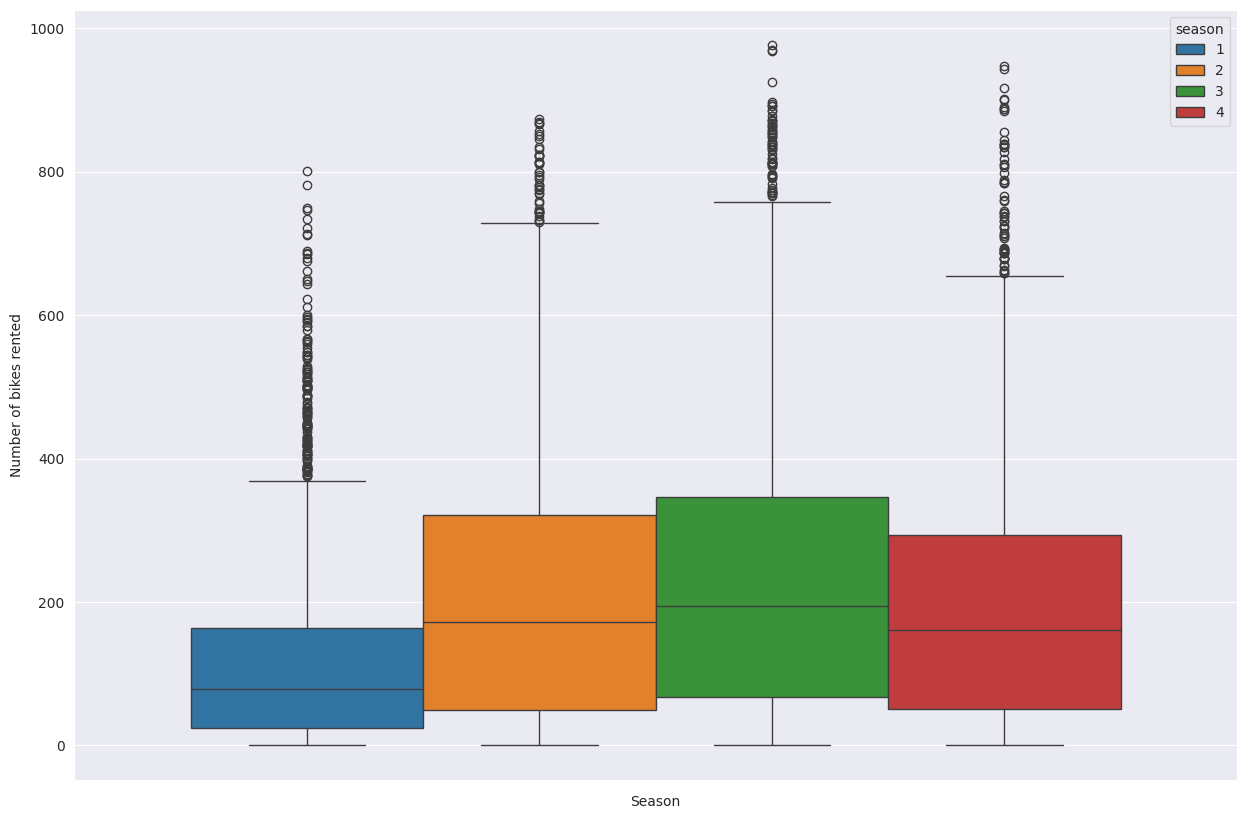

In [110]:
plt.figure(figsize=(15,10))
sns.boxplot(data=df,y='count',hue='season')
plt.xlabel('Season')
plt.ylabel('Number of bikes rented')

### Conclusion.

The probability of renting a bike during the fall season appears to be higher compared to other seasons. Conversely, the probability of renting bikes during the winter and spring seasons is lower in comparison to summer and fall.

## Distribution of count of rented bikes across Weather types

/tmp/ipykernel_29380/3995104985.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




Text(0, 0.5, 'Number of bikes rented')

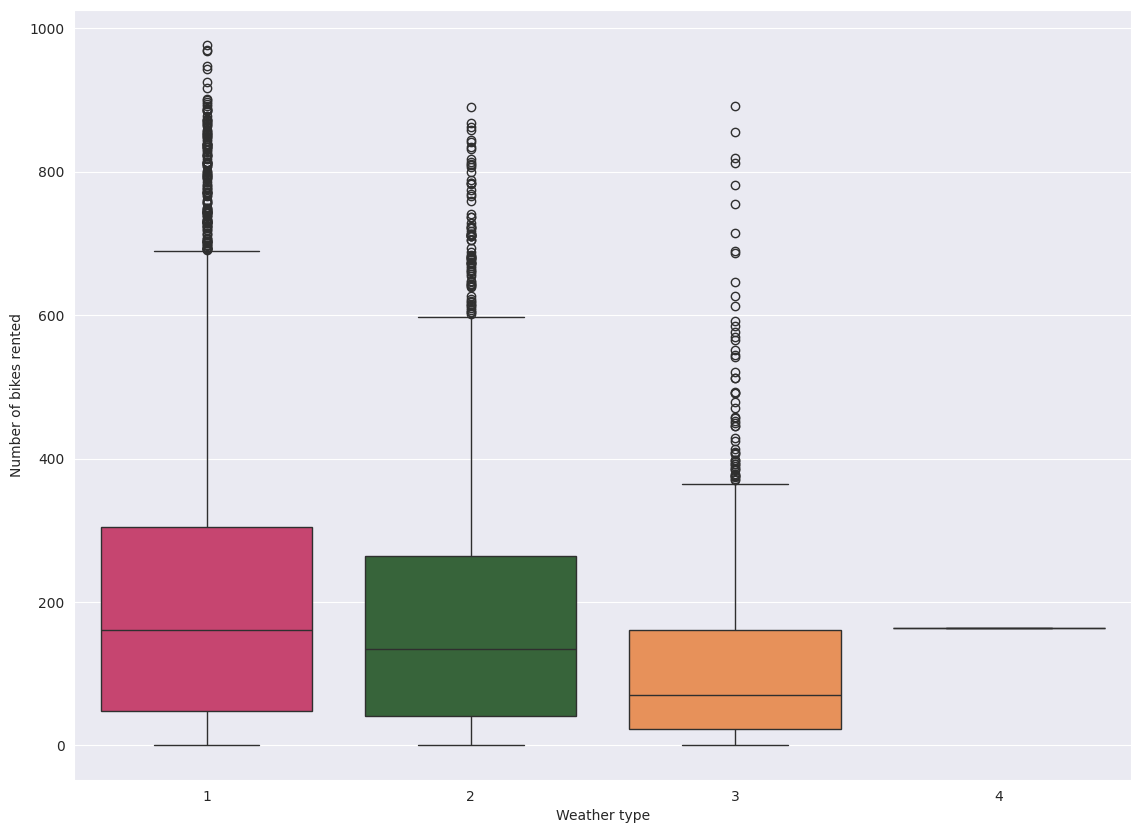

In [111]:
plt.figure(figsize=(30,10))

plt.subplot(1,2,2)
sns.boxplot(data=df,y='count',x='weather',palette=['#DB3069','#306B34','#FF8C42','#586BA4'])
plt.xlabel('Weather type')
plt.ylabel('Number of bikes rented')

### Conclusion.

The probability of renting a bike during weather condition 1 appears to be higher than in other weather types. This is supported by our univariate analysis, where approximately 70.8% of bike rentals occur in weather condition 1, while the remaining weather types collectively account for approximately 29% of bike rentals.

## Heatmap and Correlation

<Axes: >

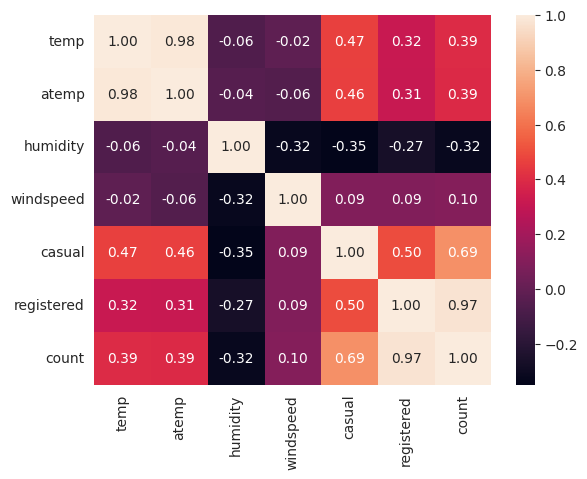

In [116]:
sns.heatmap(df.corr(numeric_only=True),annot=True,fmt='.2f')

## Conclusion.

- The weak positive correlation of 0.39 between temperature and the number of bikes rented suggests that, on average, fewer people prefer to use electric cycles during the daytime between 12 PM to 3 PM. This observation aligns with our univariate analysis, where we discovered that the average number of cycles rented during this time frame was lower compared to other times of the day. A similar correlation pattern is also observed in the case of "feels-like" temperature, reinforcing this trend.

- The negative correlation between humidity and the number of cycles rented indicates that people tend to avoid using electric bikes during high humidity conditions.

- The presence of a weak positive correlation between windspeed and the number of cycles rented indicates that there is a subset of individuals who appear to favor using electric cycles during windy conditions for the sheer enjoyment of the experience. While this preference contributes to a slight increase in bike rentals on windier days, it's essential to recognize that this effect is not particularly strong, as indicated by the weak correlation.

# Hypothesis Testing.